# Task 1: Data Cleaning & Preprocessing
#### Step 1: Import Libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Step 2: Load Dataset

In [5]:
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Step 3: Explore Data (EDA)

In [10]:
# Step 3: Basic Information
print("Basic Info:")
df.info()

print("\nSummary Statistics:")
df.describe()

print("\nMissing Values Count:")
df.isnull().sum()

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:

Missing Values Count:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Step 4: Handle Missing Values

In [19]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column only if it exists
if 'Cabin' in df.columns:
    df = df.drop('Cabin', axis=1)

#### Step 5: Encode Categorical Features

In [22]:
# Encode 'Sex' with 0/1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

#### Step 6: Normalize/Standardize Numeric Features

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize 'Age' and 'Fare'
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

#### Step 7: Outlier Detection and Removal

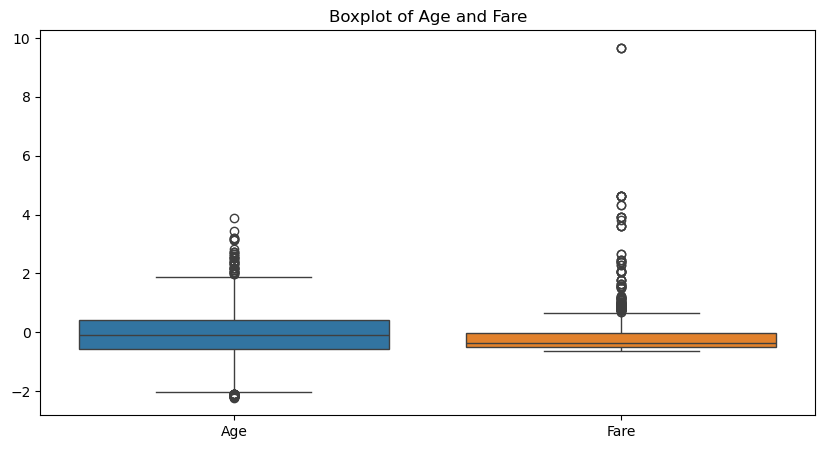

In [28]:
# Visualize outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot of Age and Fare")

# IQR Method
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | 
          (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Step 8: Final Cleaned Dataset Summary

In [31]:
# Final summary
print("Final dataset shape:", df.shape)
df.head()

# Save cleaned dataset
df.to_csv('cleaned_titanic.csv', index=False)

Final dataset shape: (721, 12)


Text(0.5, 1.0, 'Survival Rate by Gender')

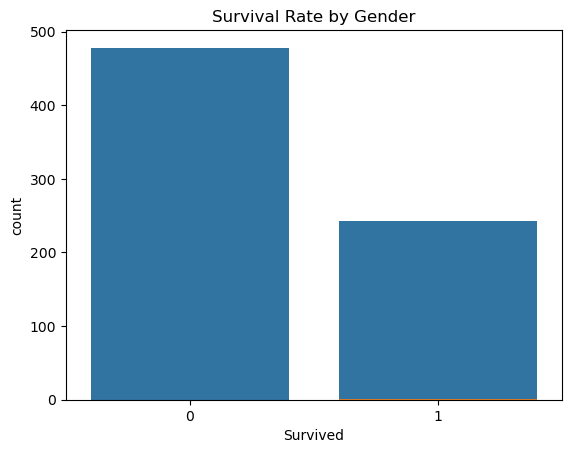

In [33]:
# Survival count plot
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")

# Survival by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")